# OpenDC

Datacenters are becoming an increasingly large contributor to the global carbon footprint. However, because of a lack of tools / guidelines, it has been challenging to optimize datacenters for carbon emissions. This is amplified by the fact that running experiments on datacenters is both expansive and time consuming. 

OpenDC is a event-based discrete datacenter simulator. Using such a tool we can do experiments on datacenters in a cost-effective and flexible way. In this demo we are going to compare a small and large datacenter using OpenDC. We are comparing the datacenters in terms of performance and sustainability.

You can read more about OpenDC [here](https://opendc.org/).

# 1. Topology

To run a simulation, OpenDC needs a definition of the datacenter, which we call the topology. The topology of a datacenter can influence its performance and sustainability greatly. It determines which tasks can be run, how efficiently they are run, and if they can be executed in parallel.

The topology of datacenter is provided using a JSON file. This file defines how many clusters are available, the hosts they contain, and what type of hosts they are. In this demo we compare the performance of two topologies: [small](topologies/1.demo_basic/large_topology.json) and [here](topologies/1.demo_basic/large_topology.json) which can both be found in the resources/topologies folder. The small topology is shown below

```json
{
    "clusters": [
        {
            "name": "C01",
            "hosts": [
                {
                    "name": "H01",
                    "count": 1,
                    "cpu": {
                        "coreCount": 16,
                        "coreSpeed": 3300
                    },
                    "memory": {
                        "memorySize": 140457600000
                    }
                }
            ]
        }
    ]
}
```

The small datacenter contains only a single cluster *C01*, which contains a single host *H01*. Host *H01* constains two CPUs with 16 cores running at 3200 Mhz, and has a memory of 140457600000 Bytes.

*Exercise 1:* Can you find out what hardware is contained in the large topology located [here](topologies/1.demo_basic/large_topology.json)?

# 2. Workloads

To run a simulation, OpenDC requires information on the type of workload to execute.


The workload is provided using two files:
<ul>
    <li> **tasks.parquet** provides a general overview of the tasks executed during the workload. </li>
    <li> **fragments.parquet** provides detailed information of each task during its runtime. </li>
</ul>

In this demo we are using running the [bitbrains-small](resources/workloads/bitbrains-small/) dataset as our workload. The bitbrains-small workload consist of 50 tasks with a runtime ranging from less than 7 days to more than 30 days. 

##### Lets have a look at the files

In [1]:
import pandas as pd

df_tasks = pd.read_parquet("workload_traces/bitbrains-small/tasks.parquet")
df_fragments = pd.read_parquet("workload_traces/bitbrains-small/fragments.parquet")

In [2]:
df_tasks.head()
# cpu_capacity = The amount of CPU required to run this task, in MHz
# mem_capacity = The amount of memory required to run this task, in MB

,id,submission_time,duration,cpu_count,cpu_capacity,mem_capacity
0,1019,2013-08-12 13:35:46,2592252000,1,2926.000135,181352
1,1023,2013-08-12 13:35:46,2592252000,1,2925.999560,260096
2,1026,2013-08-12 13:35:46,2592252000,1,2925.999717,249972
3,1052,2013-08-29 14:38:12,577855000,1,2926.000107,131245
4,1073,2013-08-21 11:07:12,1823566000,1,2599.999649,179306


In [3]:
df_fragments.head()
# cpu_count = The number of cpus required to run this fragment of the task
# cpu_usage = The amount of computational CPU power required (MHz) to run this fragment of the task

,id,duration,cpu_count,cpu_usage
0,1019,300000,1,0.000000
1,1019,300000,1,11.703998
2,1019,600000,1,0.000000
3,1019,300000,1,11.703998
4,1019,900000,1,0.000000


# 3. Carbon Trace

- Carbon Traces define the Carbon Intenisty of the available energy over time

- Gathered using ENTSO-E

- Specific to the location of the datacenter

- Defined as a JSON file

In [4]:
df_carbon = pd.read_parquet("carbon_traces/carbon_2022.parquet")

df_carbon.head()

,timestamp,carbon_intensity
0,2021-12-31 23:00:00,168.138693
1,2021-12-31 23:15:00,167.050014
2,2021-12-31 23:30:00,164.552936
3,2021-12-31 23:45:00,167.493769
4,2022-01-01 00:00:00,164.517793


# 4. Experiment

Finally, OpenDC needs an experiment file. The Experiment file describes what needs to be run, how, and when. An experiment is delilvered using a JSON file. The experiment we will use for this demo can be found [here](resources/experiments/1.demo_basic.json) and is shown below:

Example Experiment:
```json
{
    "name": "1.demo_basic",
    "topologies": [
        {
            "pathToFile": "topologies/1.demo_basic/small_topology.json"
        },
        {
            "pathToFile": "topologies/1.demo_basic/large_topology.json"
        }
    ],
    "workloads": [
        {
            "pathToFile": "workload_traces/bitbrains-small",
            "type": "ComputeWorkload"
        }
    ],
    "exportModels": [
        {
            "exportInterval": 30000
        }
    ]
}
```

The scenario file used in this demo defines four variables:
- "name" defines where the ouput files will be stored
- "topologies" defines the different topologies that will be used in the experiments
- "workloads" defines what workloads will be run
- "exportModels" defines how frequent OpenDC should export data


Note: most of the variables in the scenario file are provided as lists. This makes it possible to run different experiments using the same scenario. Graph Greenifier will run all combinations of variables as seperate experiments. In this demo, we providee two topologies, and a single workload. This means that the same workload will be executed on the both scenarios, resulting in two results.

# 5. Running an Experiment

An experiment can be run directly from the terminal using the OpenDCExperimentRunner.

In [5]:
import subprocess

pathToScenario = "experiments/1.demo_basic.json"
subprocess.run(["OpenDCExperimentRunner/bin/OpenDCExperimentRunner", "--experiment-path", pathToScenario])



 Running scenario: 0 
 Starting seed: 0 


Simulating...   0% [                                       ] 0/2 (0:00:00 / ?) 

17:43:24.662 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 200 hours:
						Tasks Total: 45
						Tasks Active: 9
						Tasks Pending: 36
						Tasks Completed: 0
						Tasks Terminated: 0

17:43:24.739 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 400 hours:
						Tasks Total: 47
						Tasks Active: 9
						Tasks Pending: 38
						Tasks Completed: 0
						Tasks Terminated: 0

17:43:24.841 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 600 hours:
						Tasks Total: 50
						Tasks Active: 9
						Tasks Pending: 41
						Tasks Completed: 0
						Tasks Terminated: 0

17:43:24.927 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 800 hours:
						Tasks Total: 50
						Tasks Active: 2
						Tasks Pending: 39
						Tasks Completed: 9
						Tasks Terminated: 0

17:43:24.977 [WARN ] org.opendc.compute.simulator.telemetry.ComputeM

Simulating...  50% [================                 ] 1/2 (0:00:04 / 0:00:04) 

17:43:27.034 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 600 hours:
						Tasks Total: 50
						Tasks Active: 31
						Tasks Pending: 19
						Tasks Completed: 0
						Tasks Terminated: 0

17:43:27.112 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 800 hours:
						Tasks Total: 50
						Tasks Active: 2
						Tasks Pending: 17
						Tasks Completed: 31
						Tasks Terminated: 0

17:43:27.125 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 1000 hours:
						Tasks Total: 50
						Tasks Active: 2
						Tasks Pending: 17
						Tasks Completed: 31
						Tasks Terminated: 0

17:43:27.139 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 1200 hours:
						Tasks Total: 50
						Tasks Active: 2
						Tasks Pending: 17
						Tasks Completed: 31
						Tasks Terminated: 0

17:43:27.153 [WARN ] org.opendc.compute.simulator.telemetry.Co

Simulating... 100% [=================================] 2/2 (0:00:04 / 0:00:00) 


CompletedProcess(args=['OpenDCExperimentRunner/bin/OpenDCExperimentRunner', '--experiment-path', 'experiments/1.demo_basic.json'], returncode=0)

## 6. Output

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df_host_small = pd.read_parquet("output/1.demo_basic/raw-output/0/seed=0/host.parquet")
df_power_small = pd.read_parquet("output/1.demo_basic/raw-output/0/seed=0/powerSource.parquet")
df_task_small = pd.read_parquet("output/1.demo_basic/raw-output/0/seed=0/task.parquet")
df_service_small = pd.read_parquet("output/1.demo_basic/raw-output/0/seed=0/service.parquet")

df_host_large = pd.read_parquet("output/1.demo_basic/raw-output/1/seed=0/host.parquet")
df_power_large = pd.read_parquet("output/1.demo_basic/raw-output/1/seed=0/powerSource.parquet")
df_task_large = pd.read_parquet("output/1.demo_basic/raw-output/1/seed=0/task.parquet")
df_service_large = pd.read_parquet("output/1.demo_basic/raw-output/1/seed=0/service.parquet")

### Host
- Information about the host at each timestamp. 
- Examples of metrics: 
    - cpu_utilization
    - power_draw 
    - energy_usage 

In [7]:
print(f"The host file contains the following columns:\n {np.array(df_host_small.columns)}\n")
print(f"The host file consist of {len(df_host_small)} samples")
df_host_small.head()

The host file contains the following columns:
 ['timestamp' 'timestamp_absolute' 'host_name' 'cluster_name' 'core_count'
 'mem_capacity' 'tasks_terminated' 'tasks_running' 'tasks_error'
 'tasks_invalid' 'cpu_capacity' 'cpu_usage' 'cpu_demand' 'cpu_utilization'
 'cpu_time_active' 'cpu_time_idle' 'cpu_time_steal' 'cpu_time_lost'
 'power_draw' 'energy_usage' 'embodied_carbon' 'uptime' 'downtime'
 'boot_time']

The host file consist of 949 samples


,timestamp,timestamp_absolute,host_name,cluster_name,core_count,mem_capacity,tasks_terminated,tasks_running,tasks_error,tasks_invalid,...,cpu_time_active,cpu_time_idle,cpu_time_steal,cpu_time_lost,power_draw,energy_usage,embodied_carbon,uptime,downtime,boot_time
0,30000000,1376344546000,H01,C01,16,140457600000,0,9,0,0,...,126144,29873856,0,0,200.765961,6025229.0,190.258759,30000000,0,1376314546000
1,60000000,1376374546000,H01,C01,16,140457600000,0,9,0,0,...,111739,29888261,0,0,200.710938,6022348.5,190.258759,30000000,0,1376314546000
2,90000000,1376404546000,H01,C01,16,140457600000,0,9,0,0,...,120930,29879070,0,0,201.082840,6024186.0,190.258759,30000000,0,1376314546000
3,120000000,1376434546000,H01,C01,16,140457600000,0,9,0,0,...,133955,29866045,0,0,200.898117,6026791.0,190.258759,30000000,0,1376314546000
4,150000000,1376464546000,H01,C01,16,140457600000,0,9,0,0,...,125486,29874514,0,0,200.801254,6025098.0,190.258759,30000000,0,1376314546000


### Tasks
- The task file contains all information about the different tasks at each timestamp. 
- Example use cases:
    - when is a task run
    - How long did it take
    - on which host was a task executed

In [8]:
print(f"The task file contains the following columns:\n {np.array(df_task_small.columns)}")
print(f"The task file consist of {len(df_task_small)} samples")
df_task_small.head()

The task file contains the following columns:
 ['timestamp' 'timestamp_absolute' 'task_id' 'task_name' 'host_name'
 'mem_capacity' 'cpu_count' 'cpu_limit' 'cpu_usage' 'cpu_demand'
 'cpu_time_active' 'cpu_time_idle' 'cpu_time_steal' 'cpu_time_lost'
 'uptime' 'downtime' 'num_failures' 'num_pauses' 'schedule_time'
 'submission_time' 'finish_time' 'task_state']
The task file consist of 26436 samples


,timestamp,timestamp_absolute,task_id,task_name,host_name,mem_capacity,cpu_count,cpu_limit,cpu_usage,cpu_demand,...,cpu_time_steal,cpu_time_lost,uptime,downtime,num_failures,num_pauses,schedule_time,submission_time,finish_time,task_state
0,30000000,1376344546000,00000000-0000-0000-5449-6ad67bd2634c,205,,20972,8,0.0,0.0,0.0,...,0,0,0,0,0,0,NaN,0,NaN,PROVISIONING
1,30000000,1376344546000,00000000-0000-0000-f88b-b8a8724c81ec,1023,H01,260,1,0.0,0.0,0.0,...,0,0,30000000,0,0,0,0.0,0,NaN,RUNNING
2,30000000,1376344546000,00000000-0000-0000-6963-0f7593d108c3,378,,8360,2,0.0,0.0,0.0,...,0,0,0,0,0,0,NaN,0,NaN,PROVISIONING
3,30000000,1376344546000,00000000-0000-0000-12c0-15a97019e937,466,,3142,4,0.0,0.0,0.0,...,0,0,0,0,0,0,NaN,0,NaN,PROVISIONING
4,30000000,1376344546000,00000000-0000-0000-451e-521296a7eea1,915,,262,1,0.0,0.0,0.0,...,0,0,0,0,0,0,NaN,0,NaN,PROVISIONING


### Power
- The task file contains all information about the power sources at each timestamp. 
- Example use cases:
    - What is the total energy used during the workload?

In [9]:
print(f"The task file contains the following columns:\n {np.array(df_power_small.columns)}")
print(f"The power file consist of {len(df_power_small)} samples")
df_power_small.head()

The task file contains the following columns:
 ['timestamp' 'timestamp_absolute' 'source_name' 'cluster_name'
 'power_draw' 'energy_usage' 'carbon_intensity' 'carbon_emission']
The power file consist of 949 samples


,timestamp,timestamp_absolute,source_name,cluster_name,power_draw,energy_usage,carbon_intensity,carbon_emission
0,30000000,1376344546000,PowerSource,C01,200.765961,6025229.0,124.368896,153.735077
1,60000000,1376374546000,PowerSource,C01,200.710938,6022348.5,85.929504,172.275345
2,90000000,1376404546000,PowerSource,C01,201.082840,6024186.0,68.640533,99.535240
3,120000000,1376434546000,PowerSource,C01,200.898117,6026791.0,146.141983,215.377563
4,150000000,1376464546000,PowerSource,C01,200.801254,6025098.0,103.674057,242.698700


### Service

- The service file contains genaral information about the experiments. 
- Example uses:
    - How many tasks are running?
    - How many hosts are up?

In [10]:
print(f"The service file contains the following columns:\n {np.array(df_service_small.columns)}")
print(f"The service file consist of {len(df_service_small)} samples")
df_service_small.head()

The service file contains the following columns:
 ['timestamp' 'timestamp_absolute' 'hosts_up' 'hosts_down' 'tasks_total'
 'tasks_pending' 'tasks_active' 'tasks_completed' 'tasks_terminated']
The service file consist of 949 samples


,timestamp,timestamp_absolute,hosts_up,hosts_down,tasks_total,tasks_pending,tasks_active,tasks_completed,tasks_terminated
0,30000000,1376344546000,1,0,44,35,9,0,0
1,60000000,1376374546000,1,0,44,35,9,0,0
2,90000000,1376404546000,1,0,44,35,9,0,0
3,120000000,1376434546000,1,0,44,35,9,0,0
4,150000000,1376464546000,1,0,44,35,9,0,0


## 7. Performance

- To properly compare the different experiments, we would like to aggregate them into meaningful values.

In [11]:
runtime_small = pd.to_timedelta(df_service_small.timestamp.max() - df_service_small.timestamp.min(), unit="ms")
runtime_large = pd.to_timedelta(df_service_large.timestamp.max() - df_service_large.timestamp.min(), unit="ms")

print(f"The small datacenter had a total runtime of {runtime_small}")
print(f"The large datacenter had a total runtime of {runtime_large}\n")



utilization_small = df_host_small.cpu_utilization.mean()
utilization_large = df_host_large.cpu_utilization.mean()

print(f"On average, the utilization of each host in the small datacenter is {utilization_small * 100:.2f}%")
print(f"On average, the utilization of each host in the large datacenter is {utilization_large * 100:.2f}%")

The small datacenter had a total runtime of 328 days 22:10:19
The large datacenter had a total runtime of 89 days 11:24:52

On average, the utilization of each host in the small datacenter is 13.66%
On average, the utilization of each host in the large datacenter is 10.77%


## 8. Sustainability

We can also compare the two datacenters in terms of sustainabilty

Next we print the total energy usage of the two datacenters

In [12]:
energy_small = df_power_small.energy_usage.sum() / 3_600_000 # convert energy to kWh
energy_large = df_power_large.energy_usage.sum() / 3_600_000 # convert energy to kWh


print(f"The small datacenter used {energy_small:.2f} kWh during the workload")
print(f"The large datacenter used {energy_large:.2f} kWh during the workload")

The small datacenter used 1794.74 kWh during the workload
The large datacenter used 2390.82 kWh during the workload


## 9. Visualization

While single numbers can be great to compare the different workloads, it does not always indicate the reasons for the difference. 

Similarly to the value aggregation, vizualization can be done directly using the pandas dataframes. 
However, Graph Greenifier also provides several predefined plotting tools to help this process.

### Service

Lets start with plotting general information using the service output file. This can be done using the *plotService* function. 
Below, we plot the number of active servers during the workload. 

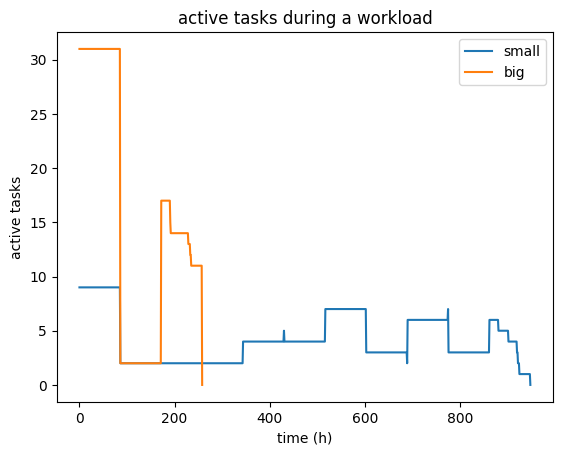

In [18]:
plt.plot(df_service_small.tasks_active, label="small")
plt.plot(df_service_large.tasks_active, label="big")

plt.title("active tasks during a workload")
plt.xlabel("time (h)")
plt.ylabel("active tasks")
plt.legend()
plt.show()

### Hosts

We can also look at the performance of the hosts. 

Lets plot the utilization of the hosts over time.

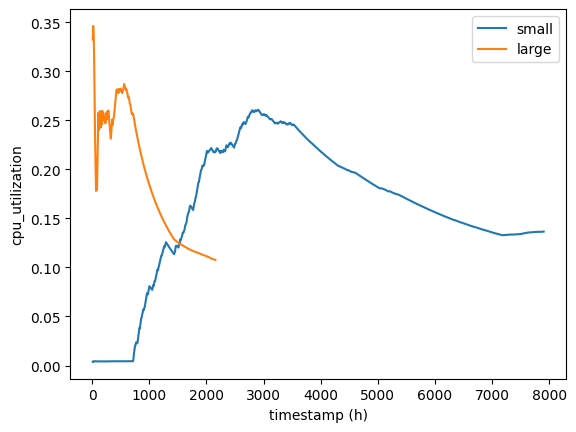

In [14]:
def plotHost(df_host, column, aggregation_method, label, window_size=1000):
    if aggregation_method not in ["mean", "sum"]:
        raise ValueError(f"incorrect aggregation method provided: {aggregation_method}, please pick on of [mean, sum]")

    df_agg = df_host.groupby("timestamp")[[column]].agg(aggregation_method)

    plt.plot(df_agg.index/1000/60/60, df_agg.rolling(window_size, min_periods=1).mean(), label=label)
    plt.xlabel("timestamp (h)")
    plt.ylabel(column)

    plt.legend()


plotHost(df_host_small, "cpu_utilization", "mean", "small")
plotHost(df_host_large, "cpu_utilization", "mean", "large")

### Sustainability

We can also plot sustainability related metrics.

Lets plot the energy usage over time

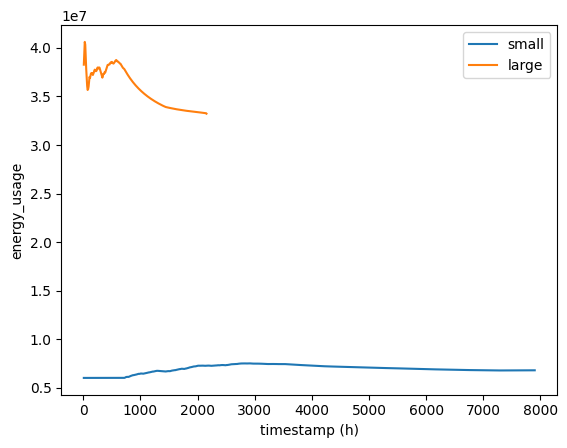

In [ ]:
plotHost(df_power_small, "energy_usage", "sum", "small")
plotHost(df_power_large, "energy_usage", "sum", "large")

#### Group exercise 1: Can you setup a datacenter which runs the workload SURF-SARA workload within 8-10 days? i.e., no less than 8 days, no more than 10 days.

-- Hint: modify the topology from topologies/1.demo_basic/topology_exercise_1.json

In [16]:
import subprocess
import pandas as pd

pathToScenario = "experiments/1.demo_basic_exercise_1.json"
subprocess.run(["OpenDCExperimentRunner/bin/OpenDCExperimentRunner", "--experiment-path", pathToScenario], stdout=subprocess.DEVNULL,
    stderr=subprocess.DEVNULL)

df_service = pd.read_parquet("output/exercise_1/raw-output/0/seed=0/service.parquet")
runtime = pd.to_timedelta(df_service.timestamp.max() - df_service.timestamp.min(), unit="ms")

print(f"The configured had a total runtime of {runtime}")

The configured had a total runtime of 80 days 08:57:00


#### Group exercise 2: Can you setup a datacenter which runs the SURF workload in less than 10 days and consumes at most 1500 KWh?

-- Hint: modify the topology from topologies/1.demo_basic/topology_exercise_2.json
-- Hint 2: it's something more than just "count"

In [17]:
import subprocess
import pandas as pd

pathToScenario = "experiments/1.demo_basic_exercise_2.json"
subprocess.run(["OpenDCExperimentRunner/bin/OpenDCExperimentRunner", "--experiment-path", pathToScenario], stdout=subprocess.DEVNULL,
    stderr=subprocess.DEVNULL)

df_service = pd.read_parquet("output/exercise_2/raw-output/0/seed=0/service.parquet")
runtime = pd.to_timedelta(df_service.timestamp.max() - df_service.timestamp.min(), unit="ms")

df_power = pd.read_parquet("output/exercise_2/raw-output/0/seed=0/powerSource.parquet")
energy_kwh = df_power.energy_usage.sum() / 3_600_000


print(f"The configured had a total runtime of {runtime}")
print(f"The configured consumed {energy_kwh:.2f} kWh during the workload")

The configured had a total runtime of 114 days 21:45:30
The configured consumed 4327.49 kWh during the workload
